Started hacking on this - warning crappy code ahead! Based on https://github.com/mari-linhares/tensorflow-workshop/blob/master/code_samples/RNN/colorbot/colorbot_including_solutions.ipynb

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib.keras.python import keras
from tensorflow.contrib.keras.python.keras import preprocessing
from tensorflow.contrib.keras.python.keras.preprocessing.text import Tokenizer
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.layers import Dense, Dropout, LSTM, Reshape
from tensorflow.contrib.keras.python.keras.optimizers import Adam

import numpy as np
import pandas

In [2]:
print (tf.__version__) # Must be v1.2+

1.2.1


In [3]:
#training_data = 
#testing_data = 
frames = [pandas.read_csv('colors-train.csv'), pandas.read_csv('colors-test.csv')]
training_data = pandas.concat(frames)

In [4]:
x_train = list(training_data["name"])
#x_test = list(testing_data["name"])

In [5]:
t = Tokenizer(char_level=True)
t.fit_on_texts(x_train)
x_train_tokenized = t.texts_to_sequences(x_train)

In [6]:
maxlen=50
x_train2 = preprocessing.sequence.pad_sequences(x_train_tokenized, maxlen=maxlen)

In [7]:
def normalize_color(value):
    return value / 255.0

In [8]:
model = Sequential()
model.add(Reshape((1, maxlen), input_shape=(maxlen,)))
model.add(LSTM(256, return_sequences=True))#dropout=0.2))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.2))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 256)         314368    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 528,387
Trainable params: 528,387
Non-trainable params: 0
_________________________________________________________________


In [9]:
r_train = [float(x) / 255 for x in training_data["red"]]
g_train = [float(x) / 255 for x in training_data["green"]]
b_train = [float(x) / 255 for x in training_data["blue"]]

In [10]:
y_train2 = np.column_stack([r_train, g_train, b_train])
y_train2.shape

(14157, 3)

In [11]:
history = model.fit(x_train2, y_train2,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Train on 12741 samples, validate on 1416 samples
Epoch 1/40
12741/12741 [==============================] - 12s - loss: 0.0626 - val_loss: 0.0628
Epoch 2/40
12741/12741 [==============================] - 10s - loss: 0.0591 - val_loss: 0.0620
Epoch 3/40
12741/12741 [==============================] - 11s - loss: 0.0571 - val_loss: 0.0601
Epoch 4/40
12741/12741 [==============================] - 10s - loss: 0.0554 - val_loss: 0.0597
Epoch 5/40
12741/12741 [==============================] - 10s - loss: 0.0539 - val_loss: 0.0585
Epoch 6/40
12741/12741 [==============================] - 10s - loss: 0.0524 - val_loss: 0.0576
Epoch 7/40
12741/12741 [==============================] - 11s - loss: 0.0509 - val_loss: 0.0584
Epoch 8/40
12741/12741 [==============================] - 11s - loss: 0.0493 - val_loss: 0.0569
Epoch 9/40
12741/12741 [==============================] - 13s - loss: 0.0477 - val_loss: 0.0586
Epoch 10/40
12741/12741 [==============================] - 11s - loss: 0.0461 - val_los

In [12]:
#history.history

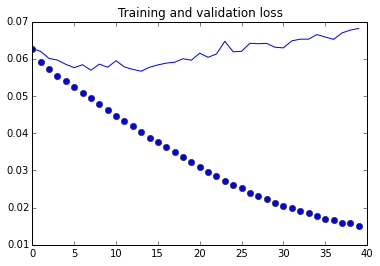

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')

plt.show()

In [14]:
# Plots a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [15]:
def predict(text):
    tokenized =  t.texts_to_sequences([text])
    preproc = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    p = model.predict(np.array(preproc))[0]
    r, g, b = int(p[0] * 255), int(p[1] * 255), int(p[2] * 255)
    print(text + ',', 'rgb:', r,g,b)
    plot_rgb(p)

light blue, rgb: 80 123 183


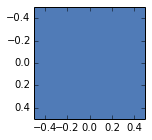

blue, rgb: 15 41 137


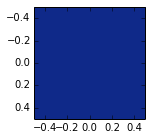

dark blue, rgb: 15 26 83


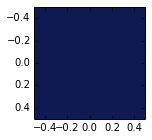

light red, rgb: 223 172 146


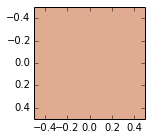

red, rgb: 227 33 29


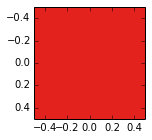

dark red, rgb: 195 21 26


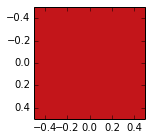

light orange, rgb: 230 181 126


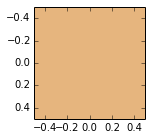

orange, rgb: 212 71 52


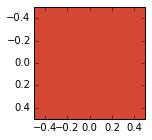

dark orange, rgb: 210 79 12


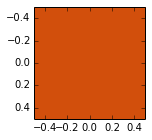

black, rgb: 17 24 35


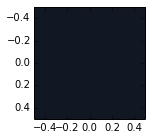

white, rgb: 235 240 232


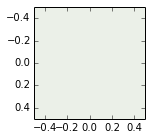

In [16]:
predict("light blue")
predict("blue")
predict("dark blue")

predict("light red")
predict("red")
predict("dark red")

predict("light orange")
predict("orange")
predict("dark orange")

predict("black")

predict("white")